In [1]:
from pandas_datareader import data

In [3]:
msft = data.DataReader("MSFT", 
                       start='2000-1-1', 
                       end='2020-12-31', 
                       data_source='yahoo')

In [4]:
msft = msft.reset_index()

In [5]:
msft['Year'] = msft['Date'].dt.year
msft['month'] = msft['Date'].dt.month
msft['day'] = msft['Date'].dt.day

In [6]:
def quarter(row):
    if row['month'] == 1 or row['month'] == 2 or row['month'] == 3:
        return 1
    elif row['month'] == 4 or row['month'] == 5 or row['month'] == 6:
        return 4
    elif row['month'] == 7 or row['month'] == 8 or row['month'] == 9:
        return 7
    else:
        return 10

msft['quarter'] = msft.apply(quarter, axis =1)

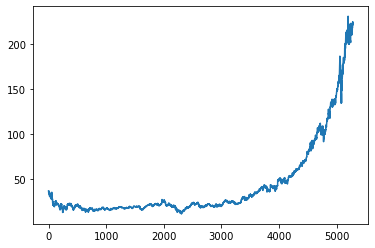

In [7]:
import matplotlib.pyplot as plt
plt.plot(msft['Adj Close'])
plt.show()

In [8]:
import pandas as pd

data = pd.read_csv('data_usa.csv', index_col=0)

data_msft = data[data['year'] >= 2000 ]
data_msft

,DATE,GDP,growth_rate,year,month,jobs,growth_jobs
212,2000-01-01,10002.857,1.045308,2000,1,131005,0.636057
213,2000-04-01,10247.679,2.447521,2000,4,131888,0.674020
214,2000-07-01,10319.825,0.704023,2000,7,132236,0.263860
215,2000-10-01,10439.025,1.155058,2000,10,132351,0.086966
216,2001-01-01,10472.879,0.324302,2001,1,132698,0.262182
...,...,...,...,...,...,...,...
291,2019-10-01,21729.124,0.866119,2019,10,151524,0.404869
292,2020-01-01,21539.689,-0.871802,2020,1,152234,0.468573
293,2020-04-01,19520.114,-9.376064,2020,4,130161,-14.499389
294,2020-07-01,21170.252,8.453526,2020,7,139566,7.225667


In [9]:
msft_final = pd.merge(left = data_msft.reset_index(drop=True), right = msft, left_on = 'month', right_on = 'quarter', how= 'left')

In [10]:
msft_final = msft_final[['Date','GDP','growth_rate','jobs','growth_jobs','High','Low','Open','Close','Volume','Adj Close','quarter','Year','month_y','day']].set_index('Date')

msft_final

,GDP,growth_rate,jobs,growth_jobs,High,Low,Open,Close,Volume,Adj Close,quarter,Year,month_y,day
Date,,,,,,,,,,,,,,
2000-01-03,10002.857,1.045308,131005,0.636057,59.312500,56.000000,58.687500,58.281250,53228400.0,37.017384,1,2000,1,3
2000-01-04,10002.857,1.045308,131005,0.636057,58.562500,56.125000,56.781250,56.312500,54119000.0,35.766914,1,2000,1,4
2000-01-05,10002.857,1.045308,131005,0.636057,58.187500,54.687500,55.562500,56.906250,64059600.0,36.144032,1,2000,1,5
2000-01-06,10002.857,1.045308,131005,0.636057,56.937500,54.187500,56.093750,55.000000,54976600.0,34.933285,1,2000,1,6
2000-01-07,10002.857,1.045308,131005,0.636057,56.125000,53.656250,54.312500,55.718750,62013600.0,35.389793,1,2000,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,21487.896,1.500426,142545,2.134474,223.610001,221.199997,221.419998,222.750000,10550600.0,222.238144,10,2020,12,24
2020-12-28,21487.896,1.500426,142545,2.134474,226.029999,223.020004,224.449997,224.960007,17933500.0,224.443069,10,2020,12,28
2020-12-29,21487.896,1.500426,142545,2.134474,227.179993,223.580002,226.309998,224.149994,17403200.0,223.634918,10,2020,12,29


In [11]:
X = msft_final.drop(['GDP','jobs','Close','Volume'], axis = 1)
y = msft_final['Close']

X_train = X[:105416]
y_train = y[1:105417]

X_test = X[105416:len(X)-1]
y_test = y[105417:]

In [12]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
display(xgb_reg.score(X_test,y_test))
display(xgb_reg.score(X_train,y_train))

[16:42:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9974603149291389

0.9972024445922247

In [13]:
pred = xgb_reg.predict(X_test)

In [14]:
from sklearn.metrics import r2_score


r2_score(y_test, pred)

0.9974603149291389

In [15]:
from sklearn.model_selection import cross_validate

results = cross_validate(xgb_reg,X_train, y_train, cv = 10)


[16:42:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [16]:
results['test_score'].mean()
results['test_score']

array([0.99745806, 0.99695276, 0.9976113 , 0.99754185, 0.99754673,
       0.99750768, 0.99727605, 0.99705048, 0.9974759 , 0.99733372])

In [17]:
import pickle

pickle.dump(xgb_reg, open('model_msft.p', 'wb'))